# Exploratory data analysis 1

This notebook demonstrates that there are less images per lap with higher speeds and 
that the truth turning angles are more extreme for higher speeds.

In [2]:
%load_ext autoreload
%autoreload 2

import os
print(os.environ['CONDA_DEFAULT_ENV'])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
donkey2


## Setup
- Download and unpack training data
- Create DonkeyCar project and load configuration

In [51]:
![ ! -d "data/" ] && \
mkdir data && \
curl -L "https://www.dropbox.com/s/eltelvjt12a4ny1/data.zip?dl=1" --output data/data.zip && \
unzip data/data.zip -d data

In [52]:
![ ! -d "mycar/" ] && \
donkey createcar --path mycar && \
cp config/myconfig.py mycar/

In [53]:
import numpy as np
import donkeycar as dk
cfg = dk.load_config(config_path='mycar/config.py')

loading config file: mycar/config.py
loading personal config over-rides from myconfig.py


## Load images

In [20]:
import os

from donkeycar.pipeline.sequence import TubRecord
from donkeycar.pipeline.types import TubDataset

def load_tub_records(tub_path, cfg):
    dataset = TubDataset(cfg, [os.path.expanduser(tub_path)])
    records = []
    for tub in dataset.tubs:
        for underlying in tub:
            record = TubRecord(cfg, tub.base_path, underlying)
            records.append(record)
    return records

def load_tub_images(tub_path, cfg):
    return [r.image() for r in load_tub_records(tub_path, cfg)]

tubs = [
    '1-1-CC-80',
    '1-2-CC-90',
    '1-3-CC-85',
    '2-1-CW-80',
    '2-2-CW-90',
    '2-3-CW-85',
    '3-2-CW-90',
    '3-3-CW-85',
    '4-1-CC-80',
    '4-2-CC-90',
    '4-3-CC-85'
]
tub_images = {}

for tub_path in tubs:
    full_path = 'data/' + tub_path
    images = load_tub_images(full_path, cfg)
    tub_images[tub_path] = images


Using catalog /Users/kristjan.roosild/PycharmProjects/dat-sci-master-thesis/data/1-1-CC-80/catalog_4.catalog
Using catalog /Users/kristjan.roosild/PycharmProjects/dat-sci-master-thesis/data/1-2-CC-90/catalog_4.catalog
Using catalog /Users/kristjan.roosild/PycharmProjects/dat-sci-master-thesis/data/1-3-CC-85/catalog_4.catalog
Using catalog /Users/kristjan.roosild/PycharmProjects/dat-sci-master-thesis/data/2-1-CW-80/catalog_4.catalog
Using catalog /Users/kristjan.roosild/PycharmProjects/dat-sci-master-thesis/data/2-2-CW-90/catalog_2.catalog
Using catalog /Users/kristjan.roosild/PycharmProjects/dat-sci-master-thesis/data/2-3-CW-85/catalog_6.catalog
Using catalog /Users/kristjan.roosild/PycharmProjects/dat-sci-master-thesis/data/3-2-CW-90/catalog_6.catalog
Using catalog /Users/kristjan.roosild/PycharmProjects/dat-sci-master-thesis/data/3-3-CW-85/catalog_4.catalog
Using catalog /Users/kristjan.roosild/PycharmProjects/dat-sci-master-thesis/data/4-1-CC-80/catalog_5.catalog
Using catalog /User

In [21]:
def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

def rmse(image1, image2):
    return np.sqrt(mse(image1, image2))

def get_diffs(images):
    return [rmse(images[0], img) for img in images]

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [30/2.54, 25/2.54]

def plot_image_diffs(images, name):
    diffs = get_diffs(images)
    plt.figure()
    plt.ylim(8.5,10.6)
    plt.plot(diffs)
    plt.title(name)
    plt.xticks(range(0, len(images), 500))
    plt.xlabel('frame number')
    plt.ylabel('RMS image difference')
    plt.grid()
    plt.show()

def get_counts(diffs, lower_bound=8.8, upper_bound=9.75):
    flip = False
    counts = []
    for i, d in enumerate(diffs):
        if not flip and d < lower_bound and (len(counts) == 0 or i - counts[-1] > 165):
            flip = True
            counts.append(i)
        if flip and d > upper_bound:
            flip = False
    return np.array(counts)

def get_lengths(counts):
    return counts[1:] - counts[:-1]

def plot_lap_frame_counts(images, name, lower_bound=8.8, upper_bound=9.75):
    diffs = get_diffs(images)
    counts = get_counts(diffs, lower_bound, upper_bound)
    lengths = get_lengths(counts)
    plt.figure()
    plt.bar(range(1, len(lengths)+1), lengths)
    plt.title(name)
    plt.xticks(range(1, len(lengths)+1))
    plt.xlabel('lap')
    plt.ylabel('frames')
    plt.grid(axis='y')
    plt.show()

def get_lengths_and_mean(images, lower_bound, upper_bound):
    diffs = get_diffs(images)
    counts = get_counts(diffs, lower_bound, upper_bound)
    lengths = get_lengths(counts)
    return lengths, int(np.mean(lengths))

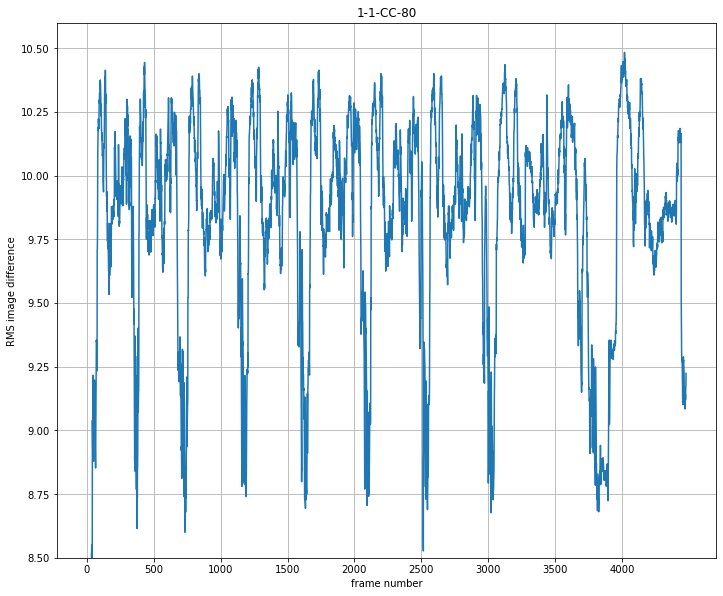

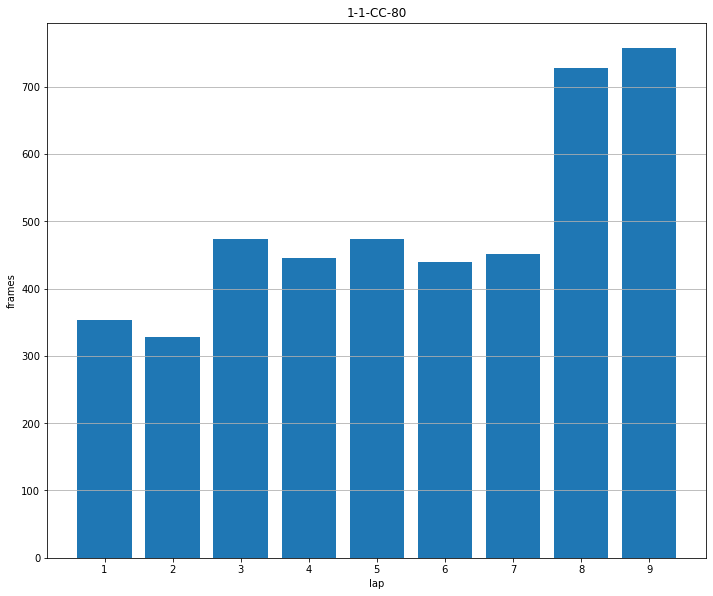

In [22]:
name = tubs[0]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 9.25, 10.1)


In [23]:
average_lap_frames = {}

In [24]:
lengths, mean = get_lengths_and_mean(images, 9.25, 10.1)
average_lap_frames[name] = mean
lengths, mean

(array([354, 328, 473, 446, 473, 440, 452, 728, 757]), 494)

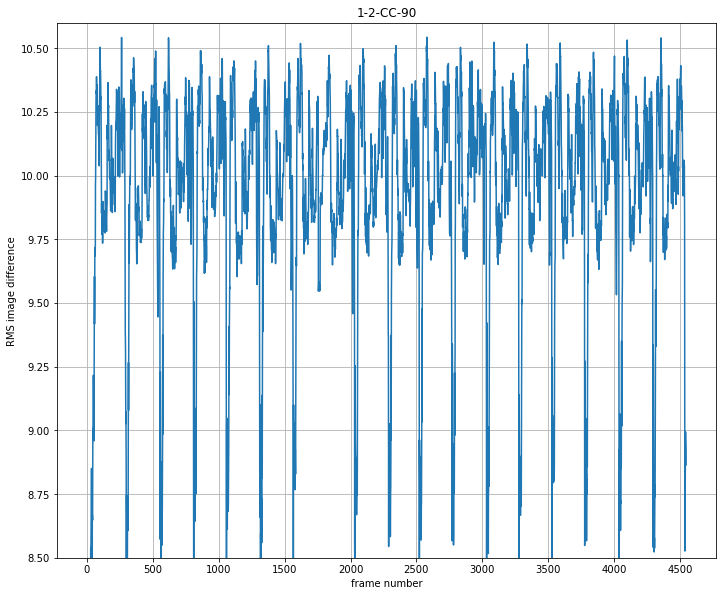

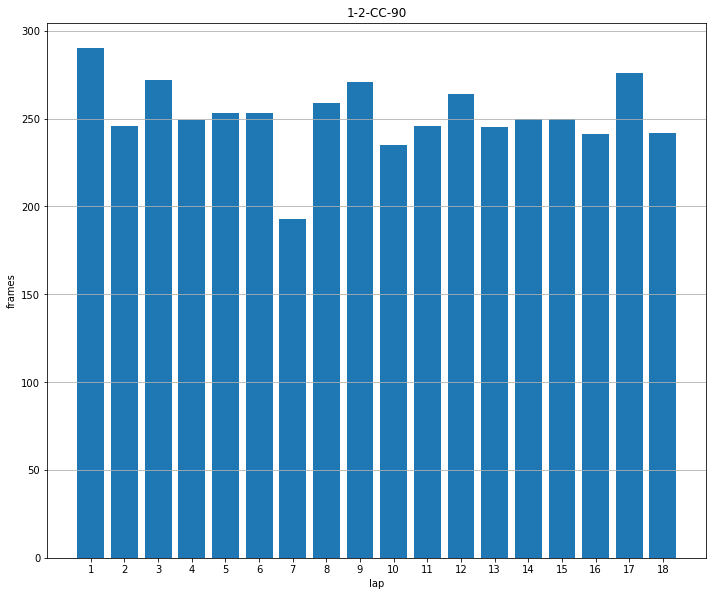

In [25]:
name = tubs[1]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 9.55, 10)


In [26]:
lengths, mean = get_lengths_and_mean(images, 9.55, 10)
average_lap_frames[name] = mean
lengths, mean

(array([290, 246, 272, 249, 253, 253, 193, 259, 271, 235, 246, 264, 245,
        250, 250, 241, 276, 242]),
 251)

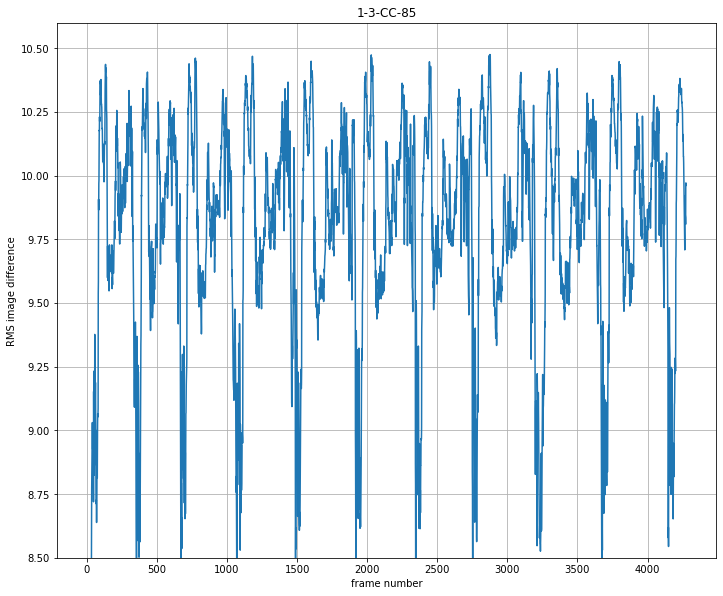

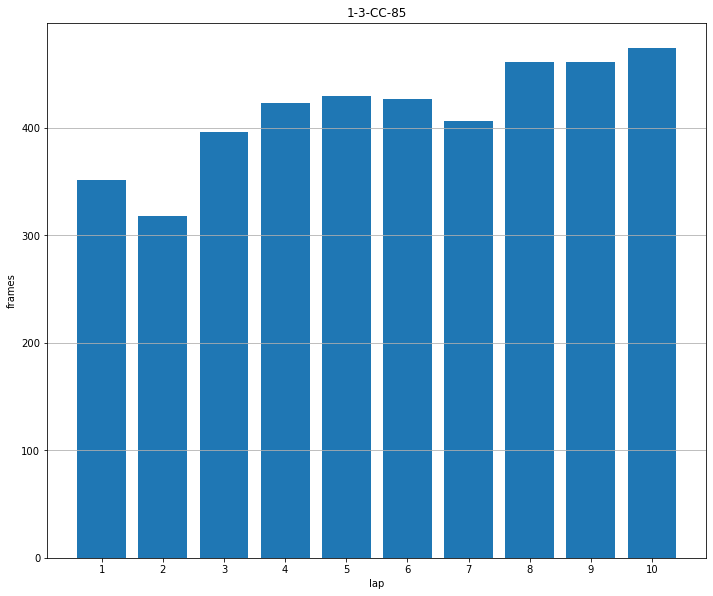

In [27]:
name = tubs[2]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name)


In [28]:
lengths, mean = get_lengths_and_mean(images, 8.8, 9.75)
average_lap_frames[name] = mean
lengths, mean

(array([351, 318, 396, 423, 430, 427, 406, 461, 461, 474]), 414)

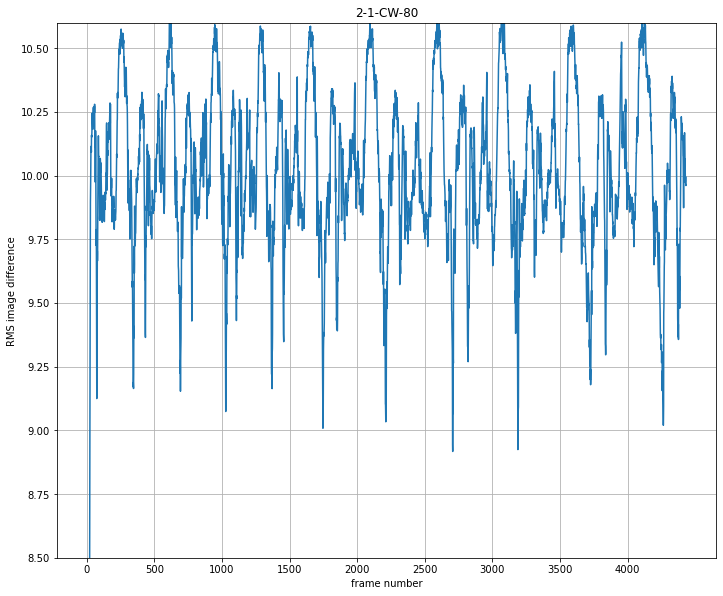

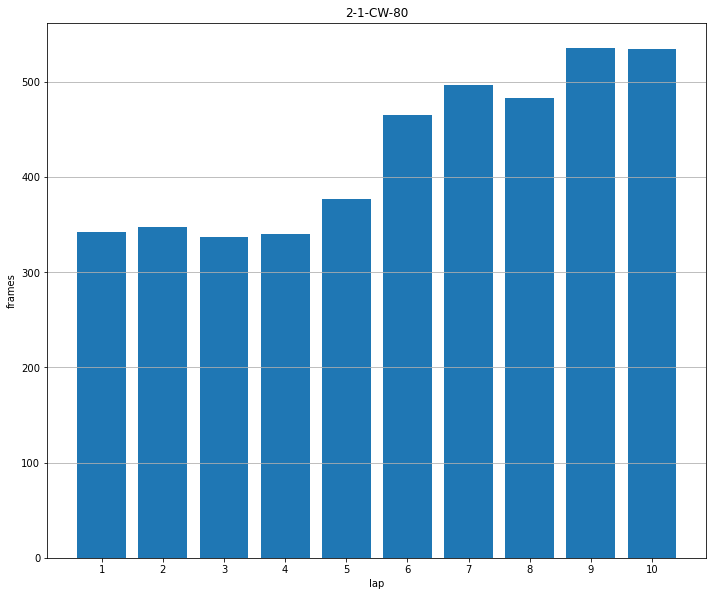

In [29]:
name = tubs[3]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 9.25, 10.4)


In [30]:
lengths, mean = get_lengths_and_mean(images, 9.25, 10.4)
average_lap_frames[name] = mean
lengths, mean

(array([342, 347, 337, 340, 377, 465, 496, 483, 535, 534]), 425)

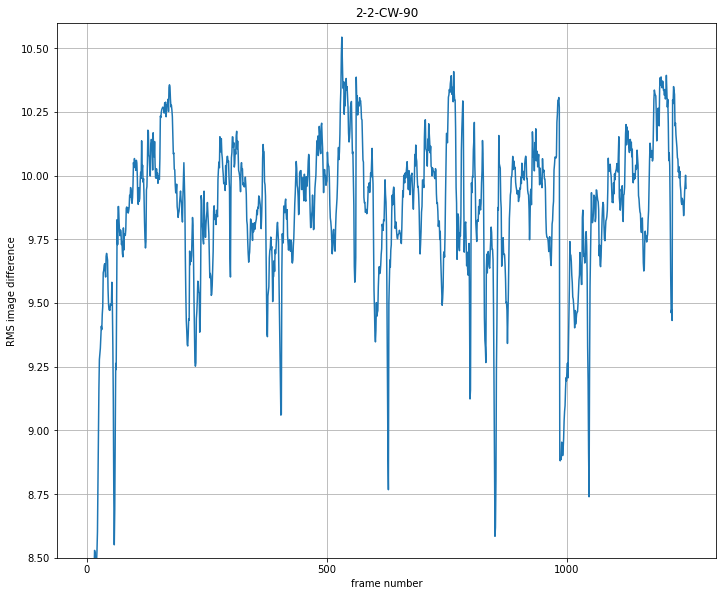

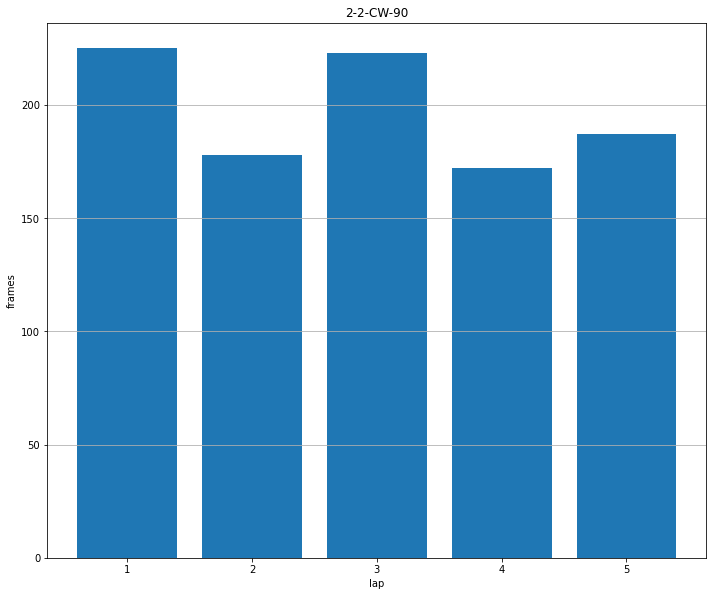

In [31]:
name = tubs[4]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 9.28, 10)


In [32]:
lengths, mean = get_lengths_and_mean(images, 9.28, 10)
average_lap_frames[name] = mean
lengths, mean

(array([225, 178, 223, 172, 187]), 197)

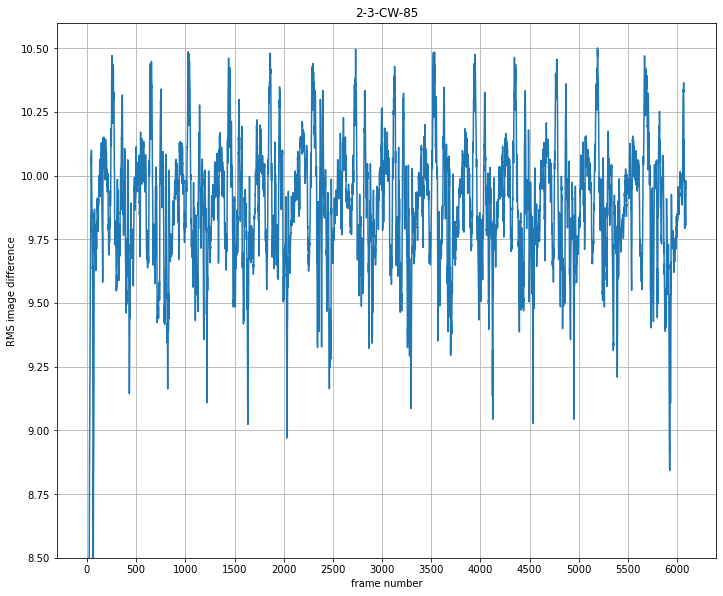

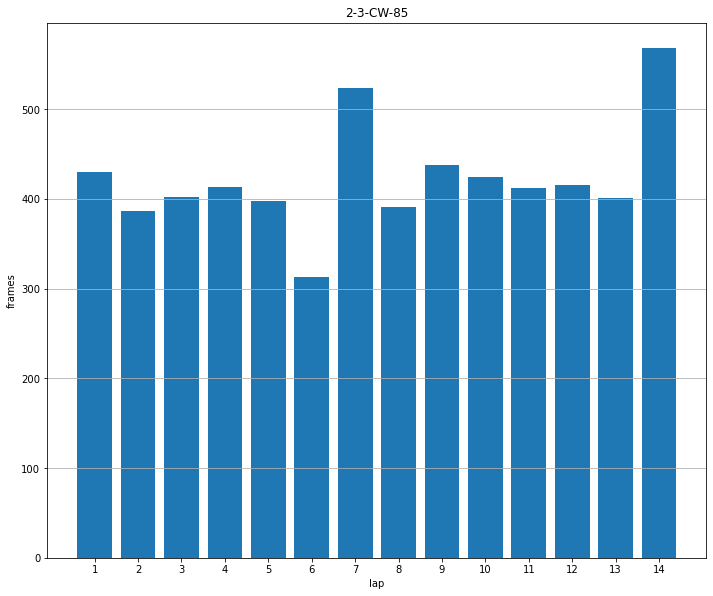

In [33]:
name = tubs[5]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 9.35, 10.0)


In [34]:
lengths, mean = get_lengths_and_mean(images, 9.35, 10.0)
average_lap_frames[name] = mean
lengths, mean

(array([430, 387, 402, 413, 398, 313, 524, 391, 438, 424, 412, 416, 401,
        568]),
 422)

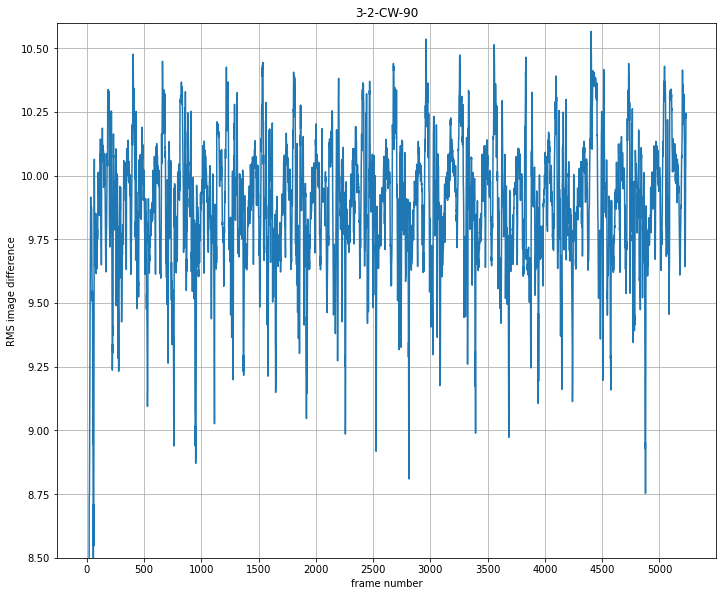

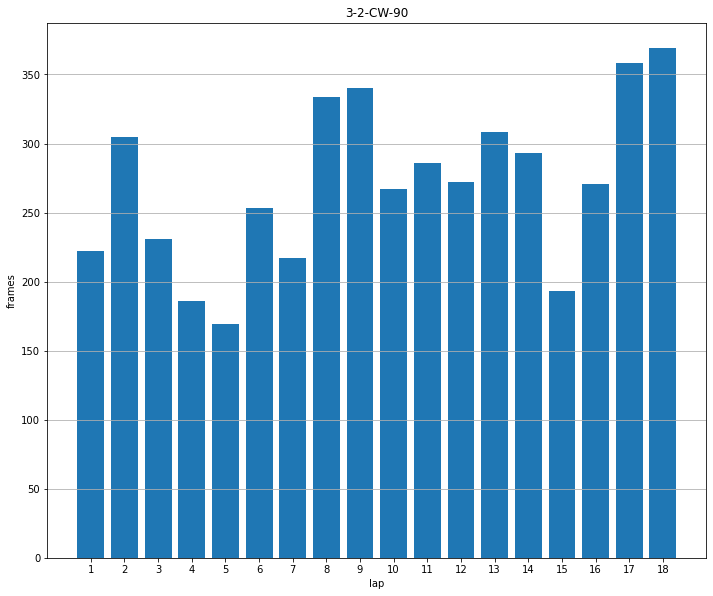

In [35]:
name = tubs[6]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 9.25, 9.8)


In [36]:
lengths, mean = get_lengths_and_mean(images, 9.35, 10.0)
average_lap_frames[name] = mean
lengths, mean

(array([221, 306, 182, 234, 169, 254, 216, 274, 332, 336, 202, 295, 303,
        358, 194, 270, 358, 266]),
 265)

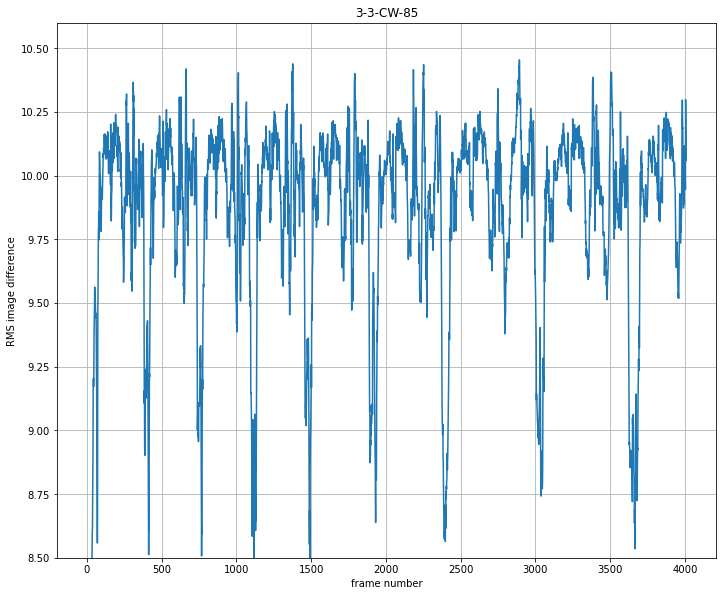

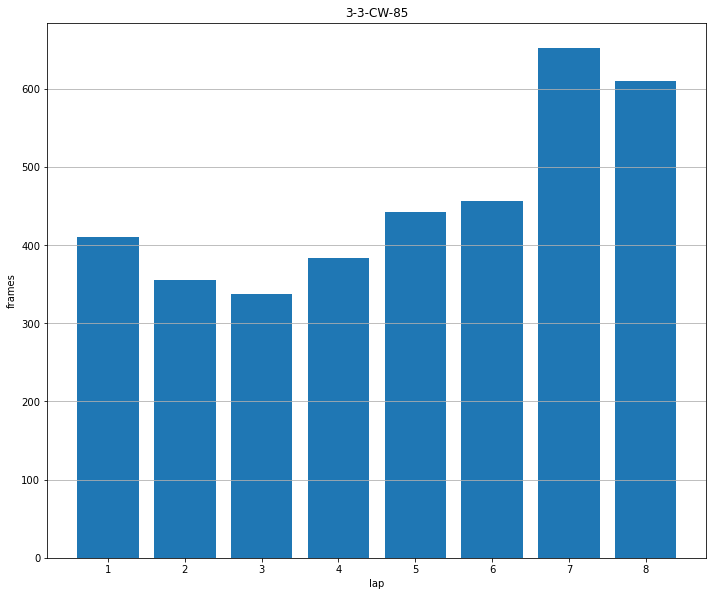

In [37]:
name = tubs[7]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 8.75, 10)


In [38]:
lengths, mean = get_lengths_and_mean(images, 8.75, 10)
average_lap_frames[name] = mean
lengths, mean

(array([411, 355, 338, 383, 443, 456, 652, 610]), 456)

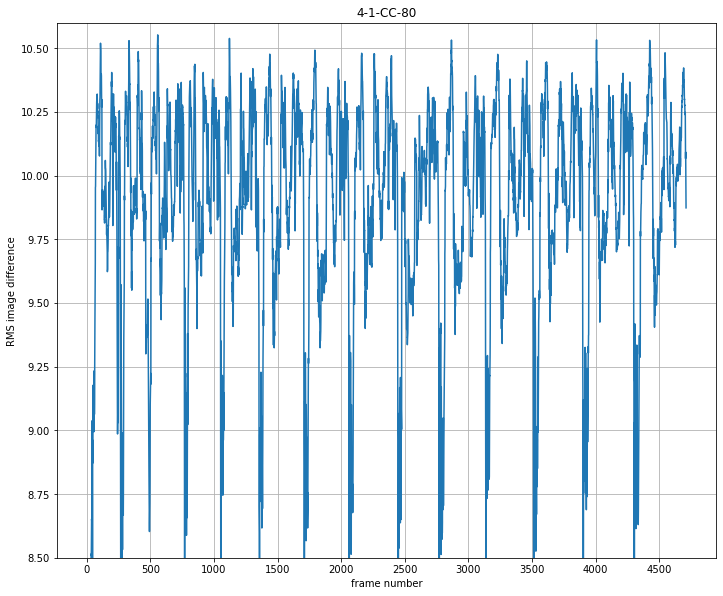

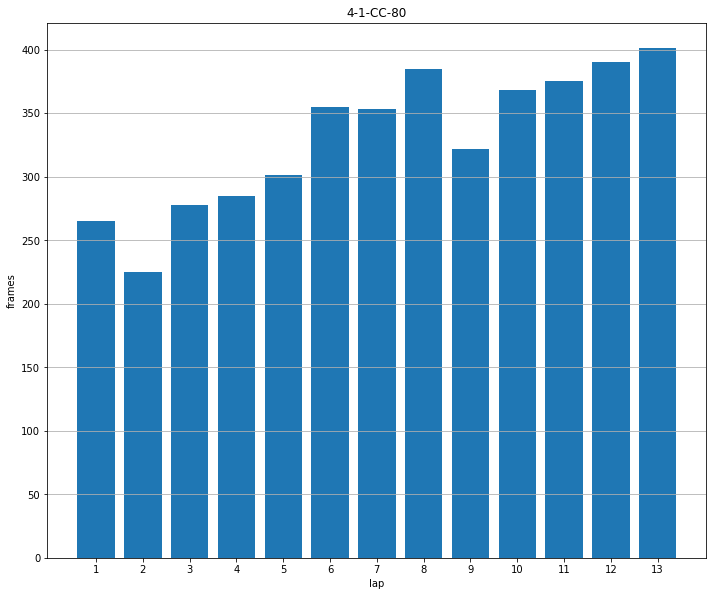

In [39]:
name = tubs[8]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 8.75, 9.5)


In [40]:
lengths, mean = get_lengths_and_mean(images, 8.75, 9.5)
average_lap_frames[name] = mean
lengths, mean

(array([265, 225, 278, 285, 301, 355, 353, 385, 322, 368, 375, 390, 401]), 331)

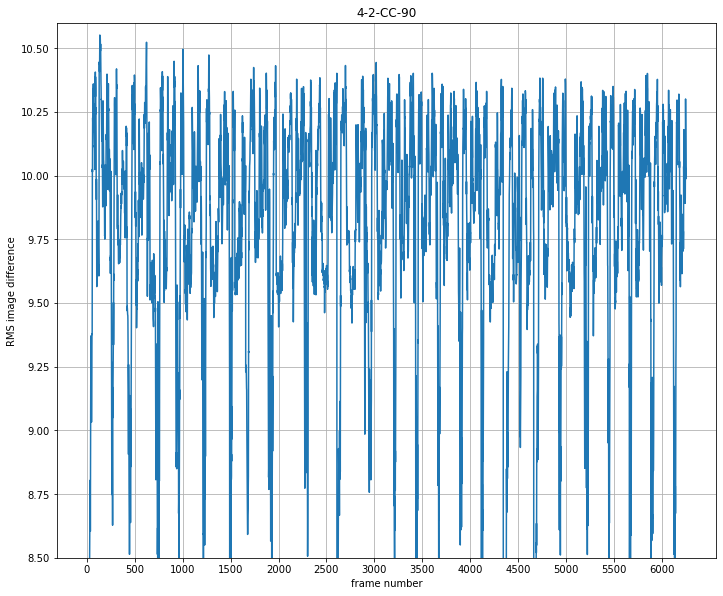

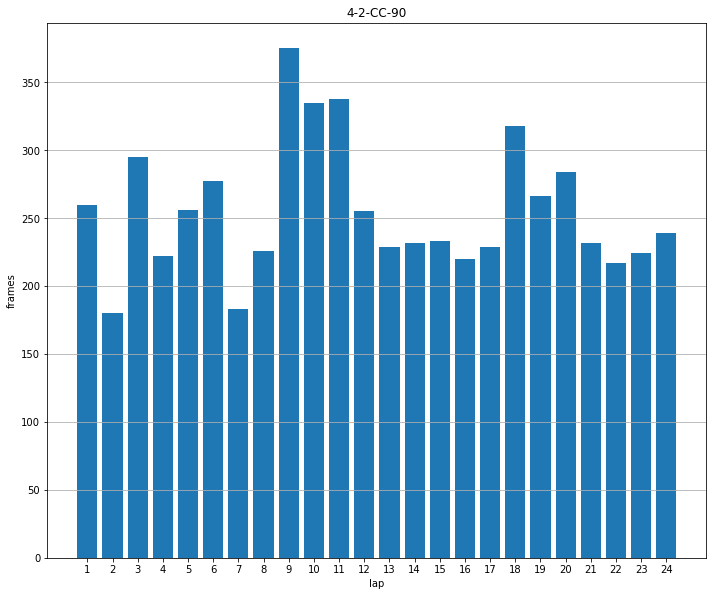

In [41]:
name = tubs[9]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 8.8, 10)


In [42]:
lengths, mean = get_lengths_and_mean(images, 8.8, 10)
average_lap_frames[name] = mean
lengths, mean

(array([260, 180, 295, 222, 256, 277, 183, 226, 375, 335, 338, 255, 229,
        232, 233, 220, 229, 318, 266, 284, 232, 217, 224, 239]),
 255)

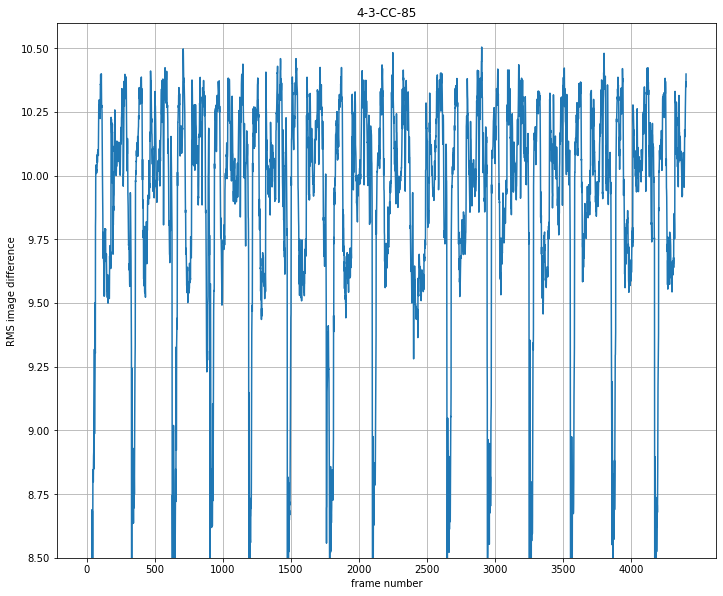

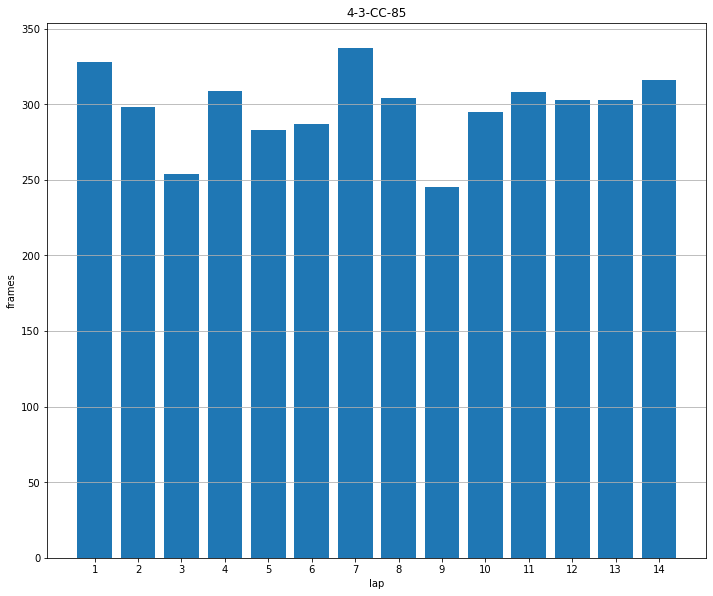

In [43]:
name = tubs[10]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 9.3, 10)

In [44]:
lengths, mean = get_lengths_and_mean(images, 9.3, 10)
average_lap_frames[name] = mean
lengths, mean

(array([328, 298, 254, 309, 283, 287, 337, 304, 245, 295, 308, 303, 303,
        316]),
 297)

In [45]:
average_lap_frames

{'1-1-CC-80': 494,
 '1-2-CC-90': 251,
 '1-3-CC-85': 414,
 '2-1-CW-80': 425,
 '2-2-CW-90': 197,
 '2-3-CW-85': 422,
 '3-2-CW-90': 265,
 '3-3-CW-85': 456,
 '4-1-CC-80': 331,
 '4-2-CC-90': 255,
 '4-3-CC-85': 297}

In [46]:
from collections import defaultdict

speed_averages = defaultdict(list)

for tubname, lap_average in average_lap_frames.items():
    speed_averages[tubname[-2:]].append(lap_average)
speed_averages

defaultdict(list,
            {'80': [494, 425, 331],
             '90': [251, 197, 265, 255],
             '85': [414, 422, 456, 297]})

In [47]:
{k:int(np.mean(v)) for k,v in speed_averages.items()}

{'80': 416, '90': 242, '85': 397}

In [48]:
speed_image_count = defaultdict(list)

for tubname, images in tub_images.items():
    print(tubname, len(images))
    speed_image_count[tubname[-2:]].append(len(images))
speed_image_count

1-1-CC-80 4480
1-2-CC-90 4546
1-3-CC-85 4276
2-1-CW-80 4433
2-2-CW-90 1249
2-3-CW-85 6090
3-2-CW-90 5233
3-3-CW-85 4008
4-1-CC-80 4713
4-2-CC-90 6253
4-3-CC-85 4402


defaultdict(list,
            {'80': [4480, 4433, 4713],
             '90': [4546, 1249, 5233, 6253],
             '85': [4276, 6090, 4008, 4402]})

In [49]:
{k: sum(v) for k,v in speed_image_count.items()}

{'80': 13626, '90': 17281, '85': 18776}

## Load ground truth angles

In [64]:
def load_tub_angles(tub_path, cfg):
    return [r.underlying['user/angle'] for r in load_tub_records(tub_path, cfg)]

tub_angles = {}
for tub_path in tubs:
    full_path = 'data/' + tub_path
    angles = load_tub_angles(full_path, cfg)
    tub_angles[tub_path] = angles   

Using catalog /Users/kristjan.roosild/PycharmProjects/dat-sci-master-thesis/data/1-1-CC-80/catalog_4.catalog
Using catalog /Users/kristjan.roosild/PycharmProjects/dat-sci-master-thesis/data/1-2-CC-90/catalog_4.catalog
Using catalog /Users/kristjan.roosild/PycharmProjects/dat-sci-master-thesis/data/1-3-CC-85/catalog_4.catalog
Using catalog /Users/kristjan.roosild/PycharmProjects/dat-sci-master-thesis/data/2-1-CW-80/catalog_4.catalog
Using catalog /Users/kristjan.roosild/PycharmProjects/dat-sci-master-thesis/data/2-2-CW-90/catalog_2.catalog
Using catalog /Users/kristjan.roosild/PycharmProjects/dat-sci-master-thesis/data/2-3-CW-85/catalog_6.catalog
Using catalog /Users/kristjan.roosild/PycharmProjects/dat-sci-master-thesis/data/3-2-CW-90/catalog_6.catalog
Using catalog /Users/kristjan.roosild/PycharmProjects/dat-sci-master-thesis/data/3-3-CW-85/catalog_4.catalog
Using catalog /Users/kristjan.roosild/PycharmProjects/dat-sci-master-thesis/data/4-1-CC-80/catalog_5.catalog
Using catalog /User

## EDA
How many data points are there per specific direction (CC - Counter Clockwise and CW - ClockWise) 
and speed (80, 85 and 90)?

In [65]:
from collections import defaultdict
dir_speed_counts = defaultdict(int)
for k, v in tub_angles.items():
    dir_speed_counts[k[-5:]] += len(v)


dir_speed_counts = list(dir_speed_counts.items())
dir_speed_counts.sort()
dir_speed_counts

[('CC-80', 9193),
 ('CC-85', 8678),
 ('CC-90', 10799),
 ('CW-80', 4433),
 ('CW-85', 10098),
 ('CW-90', 6482)]

## Histograms
demonstrate that higher speeds have more extreme ground truth turning angles

In [66]:
from collections import OrderedDict
from matplotlib import pyplot as plt

def get_angles_for_direction(tub_angles, direction):
    direction_tub_angles = {k: v for k, v in tub_angles.items() if direction in k}
    direction_tub_angles = OrderedDict(sorted(list(direction_tub_angles.items()), key=lambda k: k[0][-2:]))
    direction_angles_by_speed = OrderedDict()
    for k, v in direction_tub_angles.items():
        if direction_angles_by_speed.get(k[-2:]):
            direction_angles_by_speed[k[-2:]].extend(v)
        else:
            direction_angles_by_speed[k[-2:]] = v
    return direction_angles_by_speed

get_angles_for_direction(tub_angles, direction)


def plot_all(name, tub_angles):
    plt.figure()
    hist, bins, _ = plt.hist(tub_angles.values(), bins=9, density=True)
    plt.title(name)
    plt.legend(tub_angles.keys())
    plt.xlabel('angle')
    plt.ylabel('count')
    plt.grid()
    plt.show()
    return hist

### For counter clockwise direction

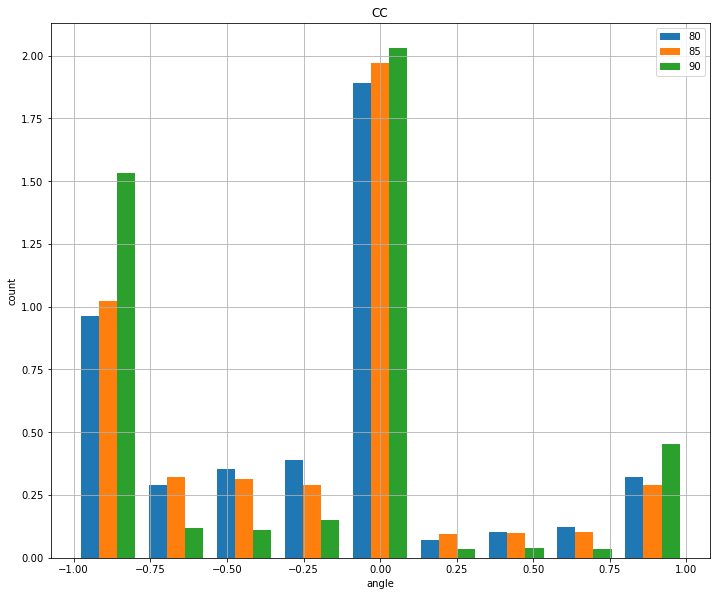

In [67]:
hist = plot_all(direction, get_angles_for_direction(tub_angles, 'CC'))

### For clockwise direction

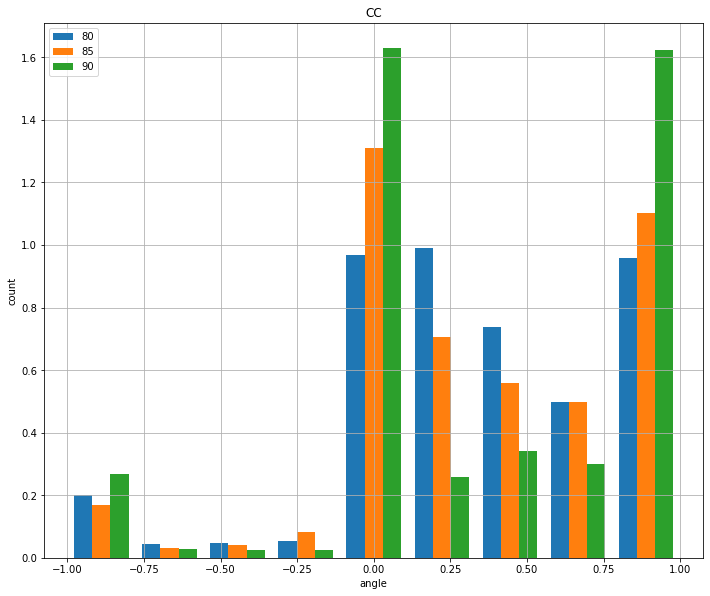

In [68]:
hist = plot_all(direction, get_angles_for_direction(tub_angles, 'CW'))